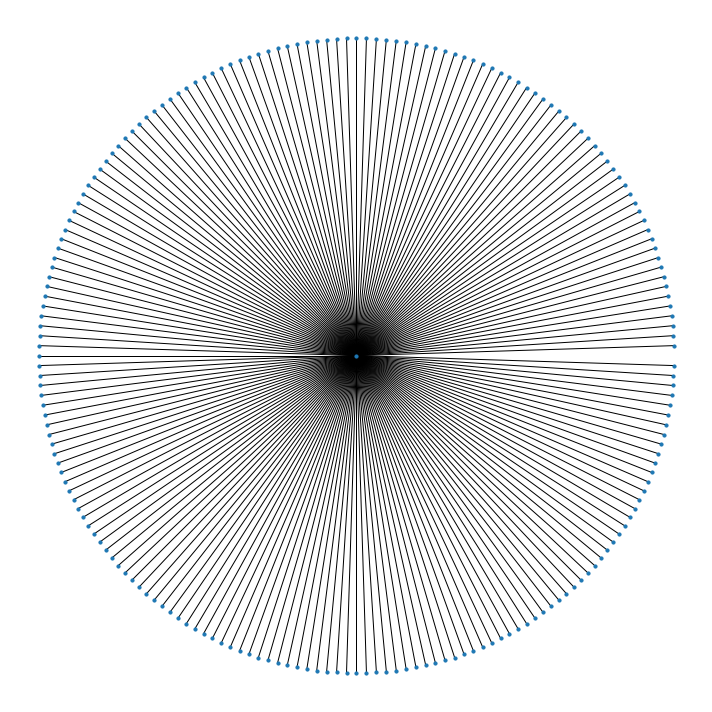

In [19]:
import networkx as nx
import math
import matplotlib.pyplot as plt
from IPython.display import Image

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
G, n, pos = nx.Graph(), 200, {0: [0,0]}

for i in range(1, n):
    G.add_edge(i, 0)
    radians = 2*math.pi * (i/n)
    pos[i] = [math.cos(radians), math.sin(radians)]

nx.draw(G, pos=pos, node_size=10)
fig.set_facecolor("#00000000")
plt.tight_layout()
fig.savefig("imgs/digraph.png")

# The Real Supernode Problem
## Or, When Barack Obama Tweets

At the time of writing, Barack Obama has over 110,000,000 Twitter followers.

On twitter, Barack Obama is a supernode.

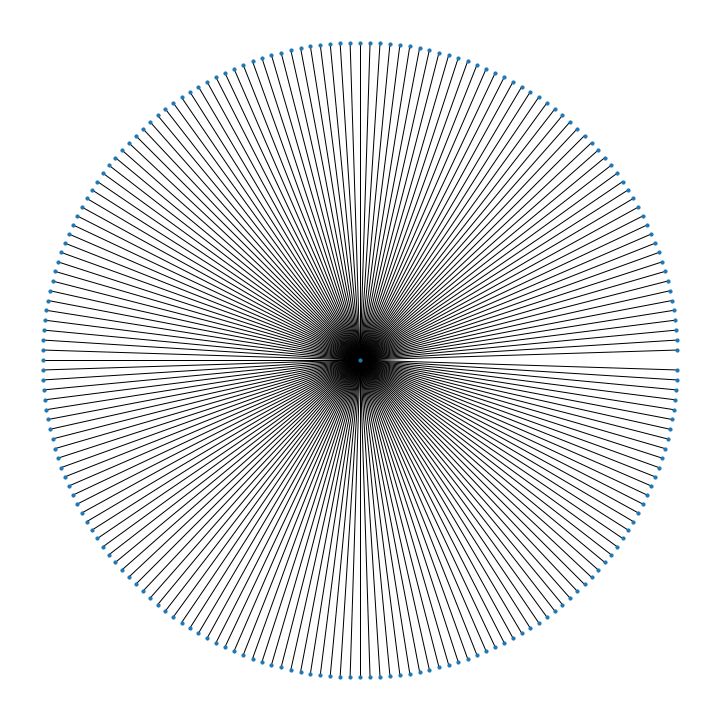

In [20]:
Image("./imgs/digraph.png", metadata={
    "alt": "digraph with 199 nodes dependent on 1 central one",
    "caption": "I made this so this post has a media card for embedding but, by happy accident, created some pixelated artifacts that resonate with the spirit of this post"
})

## The Technical Problem

As a service specification, assume:

1. Subscribers (i.e. followers) *should* observe an Obama tweet quickly (low latency).

2. No subscriber has privileged access in that all users share the same expectation of observability (fairness).

As a world-scale, real-time, distributed (albeit centralized) platform, their developers spend considerable resources on engineering low-latency bit plumbing. And, in the practical terms of end user experience, the distance in time between action and feedback matters.

But, consider the challenge of materializing Obama’s tweet in subscriber feed,

- If you manage an on-disk circular queue of tweet ID’s for each user timeline and punt the full content to lookup requests on caching infrastructure, you’ll have to fan-out a 64 bit snowflake (tweet ID) to 110,000,000 disk or memory (or both) locations. That’s nearly a gigabyte of instantaneous writes.

- If you were to send the full tweets instantly to every connected, subscribing client, N, and assumed that the size of the delivered tweet was 296 bytes — 280 characters plus two 8 byte integers for the snowflake and user ID — you’re writing (296 x N) bytes of payload alone to your network wire. With a million users, that’s about 280 MiB ignoring network overhead.

These are extremely naive simplifications. There are much smarter ways of doing things that account for social network dynamics and use reasonable heuristics.^[For example, see: [Feeding Frenzy: Selectively Materializing Users' Event Feeds](https://dl.acm.org/doi/abs/10.1145/1807167.1807257)] But, it should be clear that the technical problem is not trivial, especially once you recall that other users are also active at any given moment.

As for (2) — well, realistically, it’s an intractable specification. Assume Obama tweeted from his Kalorama residence while connected to the nearest data center in Virginia.^[I don’t actually know where twitter’s datacenters are located.] My friends in Maryland will probably receive his tweet before me. In reality, packets traverse complex routes before arriving at their digital destinations. But, it’s reasonable to simplify by saying whoever is closer as the photon flies gets their 280 characters first.

There are technical means of mitigation (albeit with wild uncertainty and impressive computational expense). If you had a map that associated every subscriber with a distribution of their read latencies conditioned by datacenter as well as one for inter-datacenter latencies, you could use both to randomly select a distribution path for each tweet such that the shared expectation converges on a single value for all subscribers.^[This convoluted method is, hilariously, an absurd and still-wrong simplification.]

Alternatively, you could discard (2) by asserting: sub-second arrival-time heterogeneity and the associated information arbitrage opportunities (and risks) are not the platform’s concern — which, I think, is perfectly reasonable.

Twitter isn’t an enterprise-grade messaging queue. It’s a social networking service.

## The Social Issue


Taking a glance at [twitter’s engineering blog](https://blog.twitter.com/engineering/en_us.html), you’ll quickly discover that Twitter cares deeply about (1). I have no idea if they care about (2) — I just made it up. It’s reasonable-sounding only if you’re thinking in the wrong context or too many of them. Fairness is a laudable concern and entities like high-frequency traders do seem to systematically exploit technicalities in parasitic ways, but complexity is expensive and the boundary separating problems you can attend to from the fantasy land of those you wish you could is much nearer than you think. If you want an aphorism: pick your battles. If you want a philosophy: [do one thing, and do it well](https://en.wikipedia.org/wiki/Unix_philosophy).

So, what is Twitter’s one thing?

Simple: Acting in accordance with its fiduciary duty to investors.

This isn’t meant to be a provocative statement. Given that twitter is a corporation, it’s a legally-enshrined obligation. And, as a publicly-traded company, there are even more commitments attached. Of course, twitter does have to satisfy some demand, lest the users go elsewhere. Setting aside manufactured demand, you can simplify twitter as a multi-sided market for attention:

- advertisers buy it;
- twitter sells it;
- users offer it in exchange for that delicious content.

Certainly, there is justifiable cause for concern with adtech. And, as someone who seems to be perpetually aware of squandered attention yet capable of resisting anything but temptation, I have serious issues with attention allocation under this particular business model (as implemented). But in stark terms, I don’t think twitter could have existed in any other form, historically-speaking. And, if you follow my ExTrEmElY oNlInE life, it’s obvious that get a lot out of it.

So, what’s my problem? Well, you see dear reader, I’m a true believer.

I think the reason for twitter’s existence, specifically, and social networking services, generally, *should* and **can** be removing the constraints of time and space from human social interactions! To facilitate the discovery of ideas, people, and connections that otherwise might not be possible! To expand the set of what we may perceive!

This may be romanticized view, but I’m a romantic at heart and this is my newsletter that your subscribing to, so I assume I’ll be forgiven any (over-)indulgence here. But, what does this have to do with supernodes? Well, at least for me, they’re one of the clearest examples of engineers pursuing (brilliant) technical solutions to mischaracterized problems in compliance with business model demands and while ignoring the social ones. That is, allowing supernodes is a problem by itself because,

**SUPERNODES RESTRICT OUR SOCIAL ATTENTION.**

This isn’t to say that I believe what Obama has to say doesn’t matter or that it doesn’t warrant my attention. I just don’t think it’s reasonable to computationally-encode and grant anyone that level of write access to our collective attention on a social medium. That’s not a *social* interaction, it merely simulates one. And in the confusion, all manner of negative consequences manifest.

Admittedly, even with technically-imposed limits -- say a 30,000 follower maximum capacity -- I’d still be aware of Obama’s tweets. As the 44th President of the United States, what he says is culturally and politically relevant, and it would traverse the social graph quiet readily. But the difference between percolation and direct distribution is vast — or, at least, I believe it is. I want a social medium that facilitates social interactions and discovery, rather than one that further entrenches the pathological hierarchy users initially (at least, I hope), meant to escape.

TL;DR?

Fuck supernodes. We don’t need them. Social tools should design against them.^[For all I know, Twitter does try to attenuate supernode signal strength. I’d applaud them if they do. But, the thing is: I can’t inspect their code, and unless Blue Sky is successful, it’s still a proprietary protocol that makes delivery opaque. I want agency and transparency, and Twitter limits both in this context. In any case, I absolutely hate footnoting the concluding sentence, but it’s the right thing to do.]

---

This post originally [published on substack](https://generativist.substack.com/p/the-real-supernode-problem).